![title](../images/perceptron.png)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
class Perceptron(object):
    def __init__(self, eta=0.01, nIter=50, randomState=1):
        self.eta = eta
        self.nIter = nIter
        self.randomState = randomState
        
    def fit(self, X, y):
        rng = np.random.RandomState(self.randomState)
        self.w_ = rng.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.nIter):
            errors = 0
            for xi, target in zip(X,y):
                updatedWeight = self.eta * (target - self.predict(xi))
                self.w_[1:] += updatedWeight * xi
                self.w_[0] += updatedWeight
                errors += int(updatedWeight != 0.0)
            print(errors)
            self.errors_.append(errors)
            
        return self
    
    def netInput (self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        # activation function included
        return np.where(self.netInput(X) >= 0.0, 1, -1)
    def step(self, y):
        return 1 if y >=0 else -1
        

In [30]:
df = pd.read_csv('iris.data',header=None)

In [31]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#selecting setosa = -1  and versicolor = 1
y = df.iloc[0:100,4].values
y = np.where (y== 'Iris-setosa', -1 , 1)

In [34]:
# extracting features , sepal length ,petal length
X = df.iloc[0:100,[0,2]].values

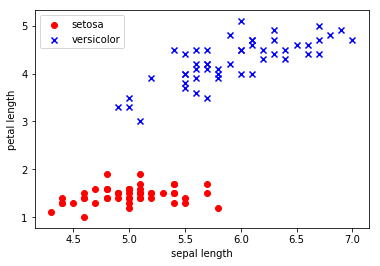

In [37]:
plt.scatter(X[:50,0], X[:50, 1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0], X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

1
3
3
2
1
0
0
0
0
0


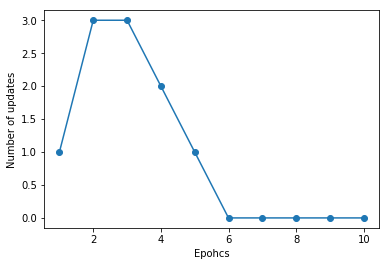

In [43]:
p = Perceptron(eta = 0.1,nIter = 10)
p.fit(X,y)
plt.plot(range(1, len(p.errors_)+1),p.errors_,marker='o')
plt.xlabel('Epohcs')
plt.ylabel('Number of updates')
plt.show()

In [61]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors =  ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
#     x1Min, x1Max = X[:, 0].min()-1, X[:, 0].max()+1
#     x2Min, x2Max = X[:, 1].min()-1, X[:, 1].max()+1
#     xx1, xx2 = np.meshgrid(np.arange(x1Min, x1Max, resolution),
#                            np.arange(x2Min, x2Max, resolution))
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    print(x1_min,x1_max,x2_min,x2_max)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        

3.3 8.0 0.0 6.1


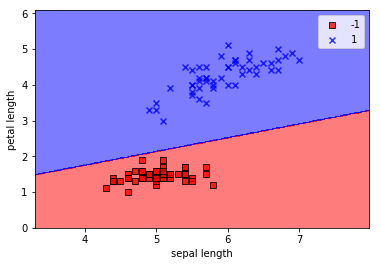

In [62]:
plot_decision_regions(X,y,classifier=p)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()